In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from cProfile import label

In [9]:
df = pd.read_csv('ronaldodata.csv')
df.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,34,2:0,Solo run,NaN
1,02/03,Liga Portugal,6,10/7/02,H,Sporting CP,Moreirense FC,3:0,LW,90+5,3:0,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:2,NaN,88,1:2,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:1,NaN,67,3:0,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:1,NaN,13,3:0,NaN,NaN


In [10]:
df.shape

(698, 13)

In [12]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Value Count(uniques)"])

,Value Count(uniques)
Season,20
Competition,15
Matchday,52
Date,461
Venue,2
Club,4
Opponent,124
Result,51
Playing_Position,6
Minute,106


In [13]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().sum().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent],axis = 1, keys = ['MISSING TOTAL','PERCENTAGES'])
missing_data

,MISSING TOTAL,PERCENTAGES
Goal_assist,240,18.461538
Playing_Position,57,4.384615
Type,15,1.153846
Season,0,0.000000
Competition,0,0.000000
Matchday,0,0.000000
Date,0,0.000000
Venue,0,0.000000
Club,0,0.000000
Opponent,0,0.000000


In [15]:
pd.DataFrame(df.Competition.value_counts())

,Competition
LaLiga,311
UEFA Champions League,140
Premier League,102
Serie A,81
Copa del Rey,22
FA Cup,13
FIFA Club World Cup,7
EFL Cup,4
Supercopa,4
Italy Cup,4


e:\ANA2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GOALS PER COMPETITION')

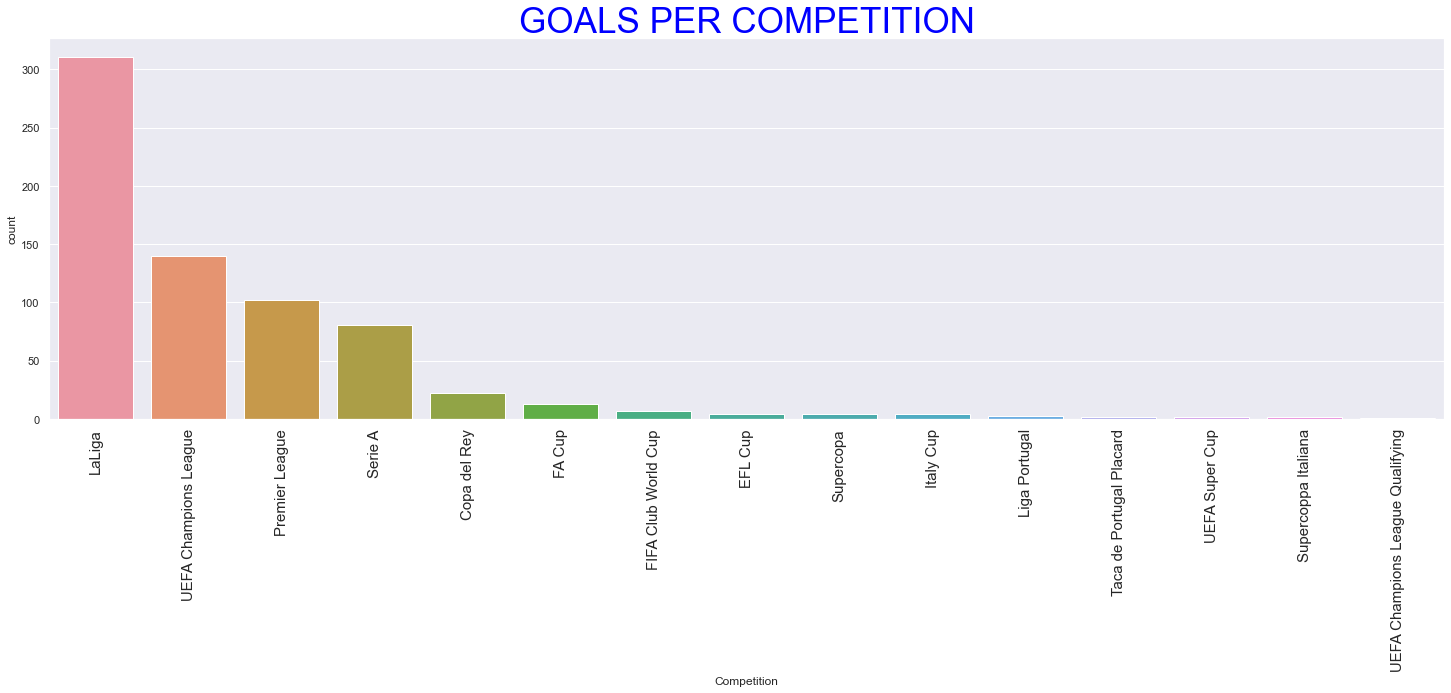

In [19]:
sns.set(rc={'figure.figsize':(25,7)})
plt.xticks(fontsize=15,rotation='vertical')
p=sns.countplot(df['Competition'],order=df.Competition.value_counts().sort_values(ascending=False).index)
p.axes.set_title("GOALS PER COMPETITION",fontsize=35, color = 'blue')

e:\ANA2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GOALS PER SEASON')

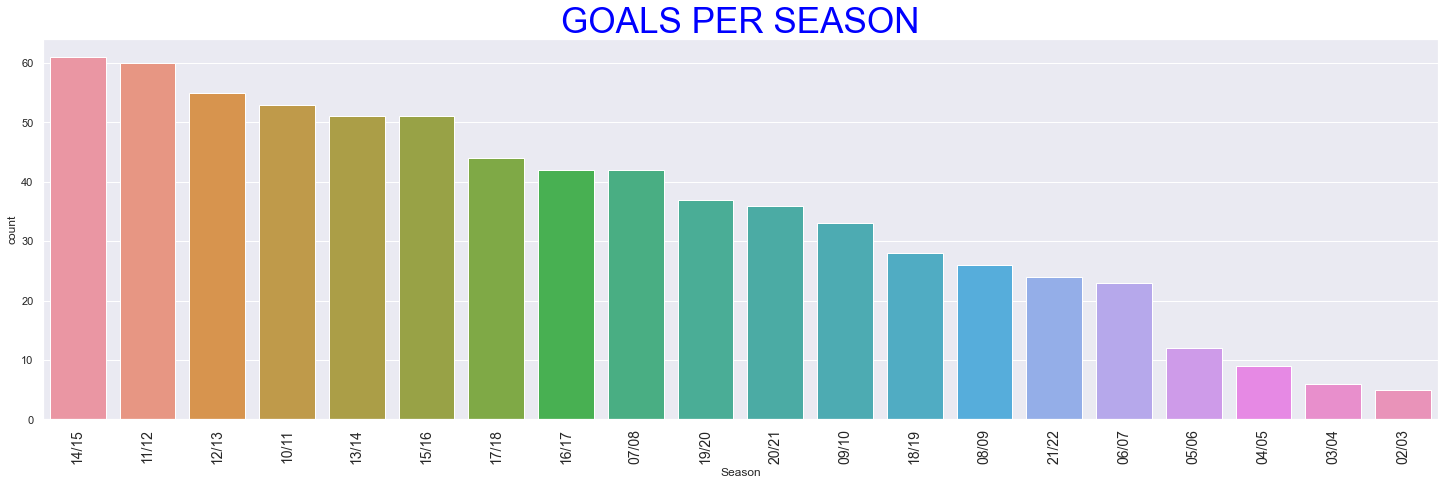

In [20]:
sns.set(rc={'figure.figsize':(25,7)})
plt.xticks(fontsize=14,rotation='vertical')
p=sns.countplot(df['Season'],order=df.Season.value_counts().sort_values(ascending=False).index)
p.axes.set_title("GOALS PER SEASON",fontsize=35,color= 'blue')

e:\ANA2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GOALS PER CLUB')

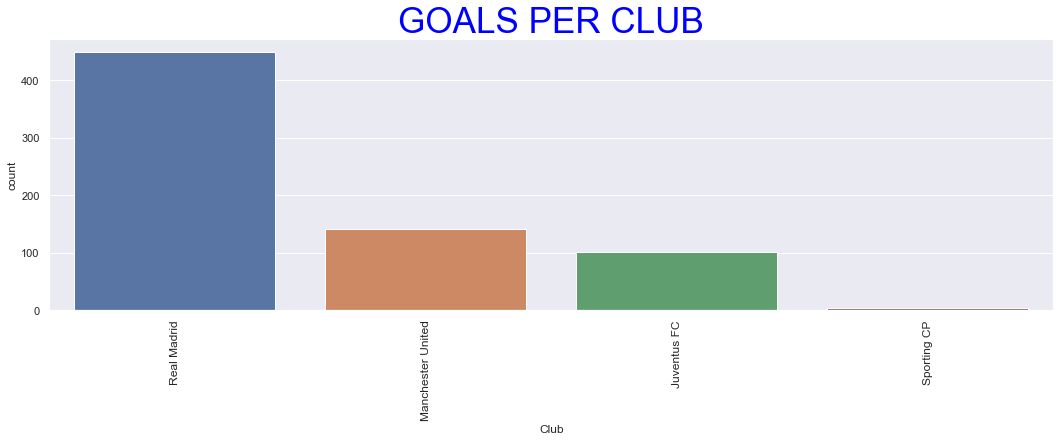

In [24]:
sns.set(rc={'figure.figsize':(18,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.countplot(df['Club'],order=df.Club.value_counts().sort_values(ascending=False).index)
p.axes.set_title("GOALS PER CLUB",fontsize=35,color= 'blue')

<AxesSubplot:title={'center':'GOALS PER CLUB'}, ylabel='Club'>

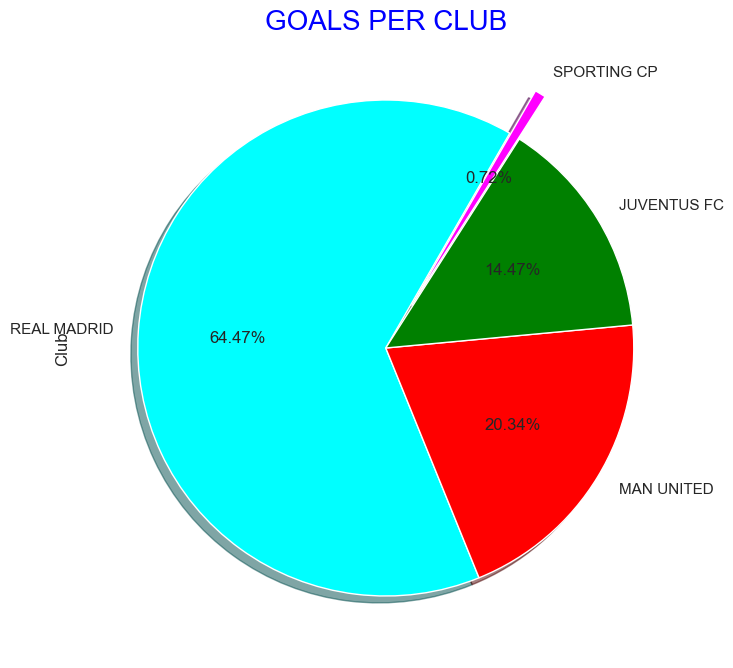

In [29]:
plt.figure(figsize=(8,10), dpi = 100)
plt.title('GOALS PER CLUB', fontsize=20, color = 'blue')
df.Club.value_counts().plot(kind='pie', labels=['REAL MADRID','MAN UNITED','JUVENTUS FC','SPORTING CP'],autopct='%1.2f%%',shadow=True,explode = [0.0,0.0,0.0,0.2],colors=
 ['cyan','red','green','magenta'],startangle = 60)

e:\ANA2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GOALS PER PLAYING POSITION')

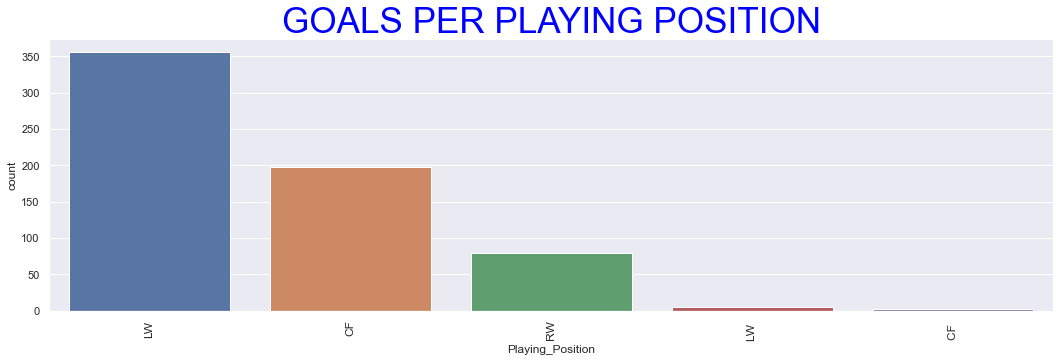

In [30]:
sns.set(rc={'figure.figsize':(18,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.countplot(df['Playing_Position'],order=df.Playing_Position.value_counts().sort_values(ascending=False).index)
p.axes.set_title("GOALS PER PLAYING POSITION",fontsize=35,color= 'blue')

e:\ANA2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GOALS PER PLAYING MINUTE')

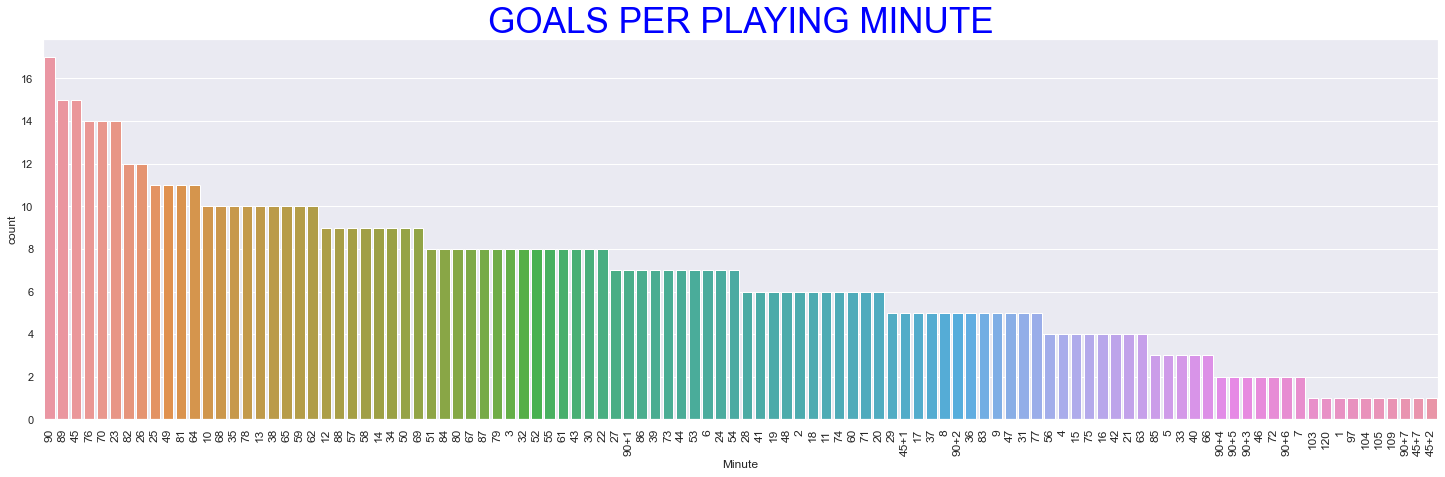

In [33]:
sns.set(rc={'figure.figsize':(25,7)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.countplot(df['Minute'],order=df.Minute.value_counts().sort_values(ascending=False).index)
p.axes.set_title("GOALS PER PLAYING MINUTE",fontsize=35,color= 'blue')

e:\ANA2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GOALS PER TYPE OF GOAL')

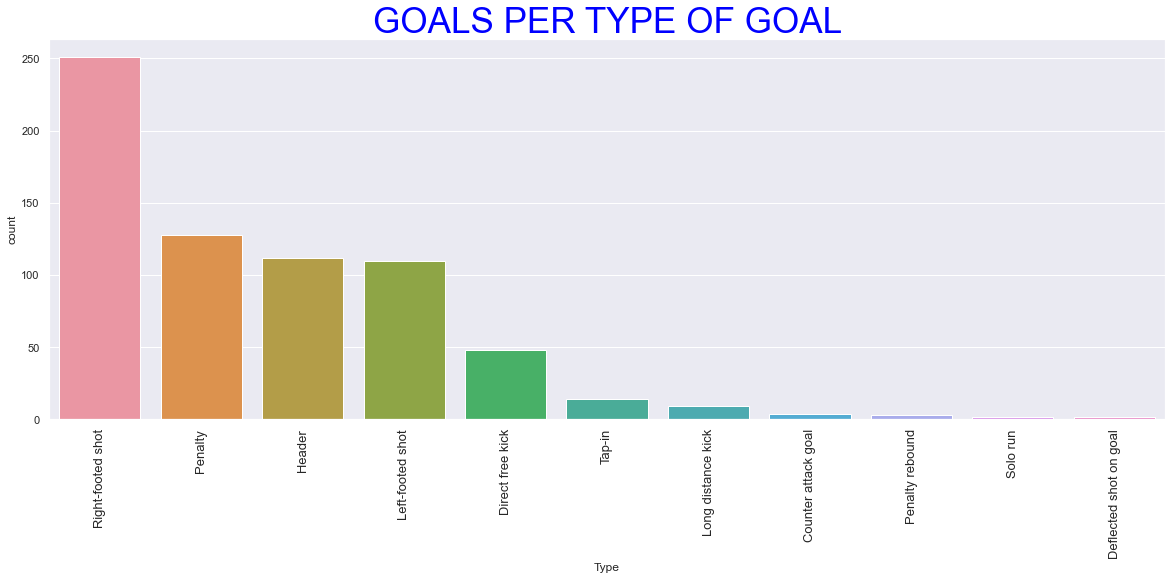

In [36]:
sns.set(rc={'figure.figsize':(20,7)})
plt.xticks(fontsize=13,rotation='vertical')
p=sns.countplot(df['Type'],order=df.Type.value_counts().sort_values(ascending=False).index)
p.axes.set_title("GOALS PER TYPE OF GOAL",fontsize=35,color= 'blue')

e:\ANA2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GOALS AGAINST FAVORITE OPPONENT')

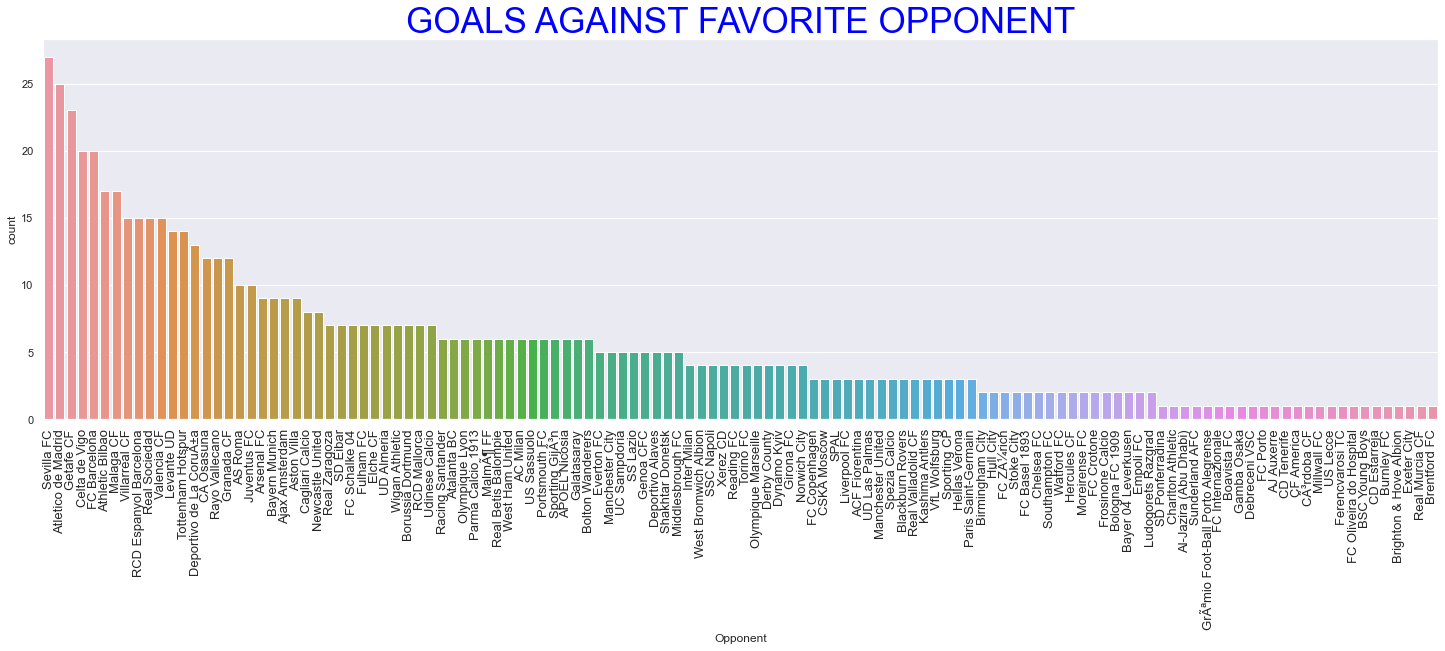

In [41]:
sns.set(rc={'figure.figsize':(25,7)})
plt.xticks(fontsize=13,rotation='vertical')
p=sns.countplot(df['Opponent'],order=df.Opponent.value_counts().sort_values(ascending=False).index)
p.axes.set_title("GOALS AGAINST FAVORITE OPPONENT",fontsize=35,color= 'blue')

e:\ANA2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'GOALS ASSISTED BY OTHERS')

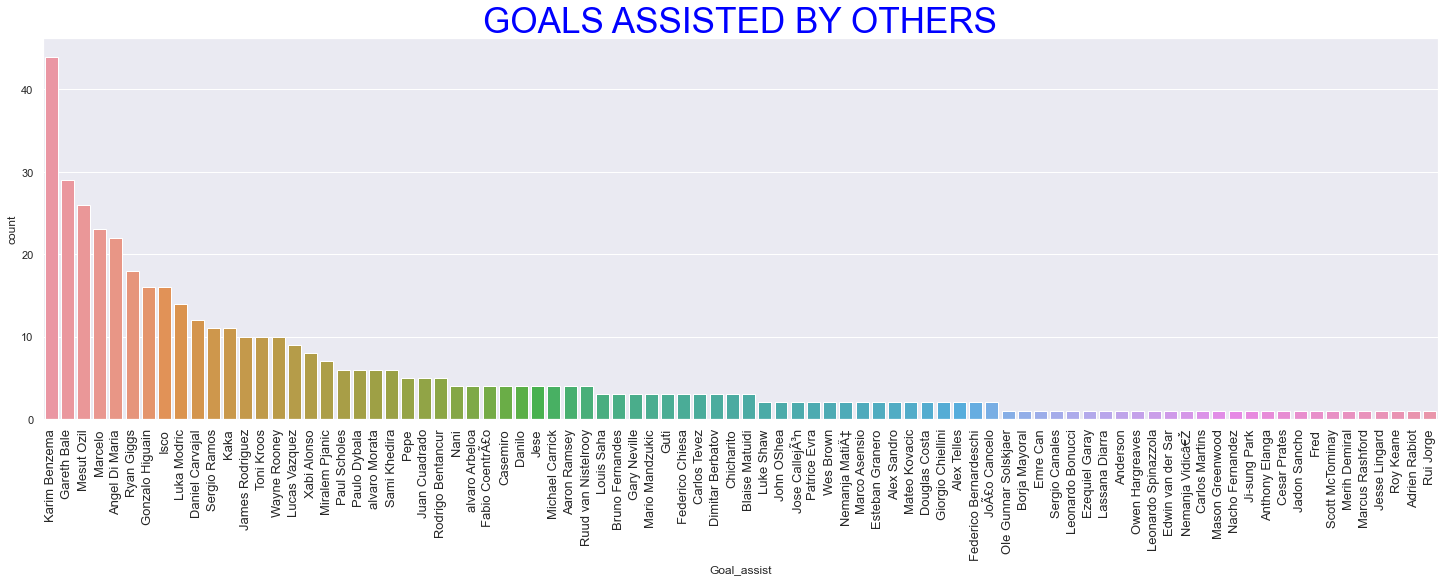

In [42]:
sns.set(rc={'figure.figsize':(25,7)})
plt.xticks(fontsize=13,rotation='vertical')
p=sns.countplot(df['Goal_assist'],order=df.Goal_assist.value_counts().sort_values(ascending=False).index)
p.axes.set_title("GOALS ASSISTED BY OTHERS",fontsize=35,color= 'blue')